In [ ]:
#Question 7

In [5]:
#Imports
import pandas as pa
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold
import math
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

In [7]:
#Data Frame and Missing Values
df = pa.read_csv('aat1_csv.csv')
df1 = pa.read_csv('dataset.csv')
df_usa = df1[df1.iso == 'USA']
df_usa_41_10 = df_usa[(df_usa.year >= 1941) & (df_usa.year <= 2010)]
merged1 = pa.merge(df_usa_41_10, df, on='year')
merged = merged1.fillna(merged1.median())

In [8]:
#Predictors and Target Value
feature_cols =['labor_force','employed_percent','employed_total','unemployed_percent','unemployed',
               'population','not_in_labor']
y = merged.pk_norm
X = merged[feature_cols]

In [9]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

In [11]:
#Feature Selection using Feature Importance and Random Forest
rfc=RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

In [13]:
print("Accuracy with Random Forest:",accuracy_score(y_test, y_pred))

f_imp = pa.Series(rfc.feature_importances_,index=feature_cols).sort_values(ascending=False)
print('\nFeature Importance')
print(f_imp)


Accuracy with Random Forest: 0.6818181818181818

Feature Importance
unemployed_percent    0.222501
unemployed            0.168161
not_in_labor          0.129990
population            0.126484
employed_percent      0.123494
labor_force           0.120142
employed_total        0.109228
dtype: float64


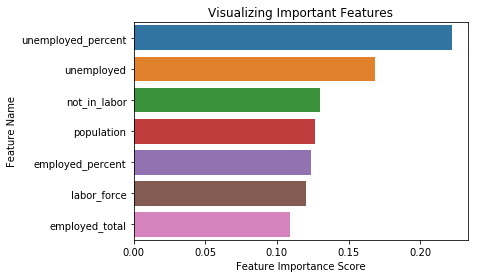

In [14]:
#Bar Plot for Comparison
sb.barplot(x=f_imp, y=f_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Name')
plt.title("Visualizing Important Features")
plt.show()

In [15]:
#Predictors after Feature Selection
new_X = X[['unemployed_percent','unemployed','employed_percent','not_in_labor']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split( new_X, y, test_size = 0.3, random_state = 100)

In [17]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score,auc,roc_curve,roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [18]:
algos = []
algos.append(('Logistic Regression', LogisticRegression()))
algos.append(('KNN', KNeighborsClassifier()))
algos.append(('Decision Tree', DecisionTreeClassifier(criterion="entropy")))
algos.append(('Naive Bayes', GaussianNB()))
algos.append(('Random Forest', RandomForestClassifier()))
algos.append(('Support Vector Machine', SVC(probability=True)))

#plt.figure(figsize=(10,8))

names = []
results = []

for name, algo in algos:
    fittedModel = algo.fit(X_train,y_train)
    predictions = fittedModel.predict(X_test)
    results.append(accuracy_score(y_test,predictions))
    names.append(name)
    msg = "%s: %f " % (name, accuracy_score(y_test,predictions).mean())
    print(msg)
    print('Training score: {:.2f}'.format(fittedModel.score(X_train, y_train)))
    print('Test score: {:.2f}'.format(fittedModel.score(X_test, y_test)))
    mse = mean_squared_error(y_test, predictions)
    rmse = math.sqrt(mse)

    print('RMSE: {:.2f}'.format(rmse))
    print('\t')
    
    #print(confusion_matrix(Y_Test,predictions))
    #fpr, tpr, thresholds = roc_curve(y_test,fittedModel.predict_proba(X_test)[:,1])
    #roc_auc = roc_auc_score(y_test,predictions)
    #plt.plot(fpr,tpr, label='%s  (area = %0.2f)' % (name, roc_auc))
    #print('\t')


#plt.plot([0, 1], [0, 1], 'k--')
#plt.xlim([-0.1, 1.1])
#plt.ylim([-0.1, 1.1])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.legend(loc=0, fontsize='small')

Logistic Regression: 0.818182 
Training score: 0.86
Test score: 0.82
RMSE: 0.43
	
KNN: 0.818182 
Training score: 0.88
Test score: 0.82
RMSE: 0.43
	
Decision Tree: 0.772727 
Training score: 1.00
Test score: 0.77
RMSE: 0.48
	
Naive Bayes: 0.636364 
Training score: 0.84
Test score: 0.64
RMSE: 0.60
	
Random Forest: 0.590909 
Training score: 0.96
Test score: 0.59
RMSE: 0.64
	
Support Vector Machine: 0.818182 
Training score: 1.00
Test score: 0.82
RMSE: 0.43
	


# Parameter Tuning

In [19]:
#Logistic Regression
param = { 
              'solver': ['newton-cg', 'lbfgs','liblinear', 'sag'],
              'random_state' : [80],
              'penalty':['l2']
            
             }

tuned_model = model_selection.GridSearchCV(LogisticRegression(), 
                param_grid=param, cv=12,scoring = 'accuracy')
tuned_model.fit(X_train, y_train)

print('Logistic Regression After Tuning best Params: ', tuned_model.best_params_)
print("Training score: {:.2f}". format(tuned_model.score(X_train, y_train))) 
print("Test score: {:.2f}". format(tuned_model.score(X_test, y_test)))

#T_test.append(tune_model.score(X_test, y_test))

Logistic Regression After Tuning best Params:  {'penalty': 'l2', 'random_state': 80, 'solver': 'sag'}
Training score: 0.88
Test score: 0.82


In [20]:
#Decision Tree
param_g = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
              
             }

t_model = model_selection.GridSearchCV(DecisionTreeClassifier(), 
                    param_grid=param_g, cv=10, scoring = 'accuracy')
t_model.fit(X_train, y_train)


print('\nDecision Tree after Tuning best Params : ', t_model.best_params_)
print("Training score: {:.2f}". format(t_model.score(X_train, y_train))) 
print("Test score: {:.2f}". format(t_model.score(X_test, y_test)))

#T_test.append(tune_model.score(x_test, y_test))


Decision Tree after Tuning best Params :  {'criterion': 'gini', 'max_depth': 1, 'splitter': 'random'}
Training score: 0.88
Test score: 0.82


In [21]:
#K Nearest Neighbour
knn = KNeighborsClassifier(n_neighbors= 10)
kf = KFold(n_splits=10)
k_range = range(1,10)
prm_gr = dict(n_neighbors = k_range)
grid = model_selection.GridSearchCV(knn, param_grid=prm_gr, cv=kf, scoring='accuracy')
grid.fit(X_train,y_train)
print('\nKNN after Tuning Score and Params')
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)


KNN after Tuning Score and Params
0.8775510204081632
{'n_neighbors': 2}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')


In [22]:
print('Training Score')
print(grid.score(X_train, y_train))
print('Testing Score')
print(grid.score(X_test, y_test))

Training Score
0.8775510204081632
Testing Score
0.8181818181818182


In [23]:
#Random Forest
para_g = {'n_estimators':[1,2,10,15],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              
             }

tunemodel = model_selection.GridSearchCV(RandomForestClassifier(), 
                    param_grid=para_g, cv=10, scoring = 'accuracy')
tunemodel.fit(X_train, y_train)


print('\nRandom Forest Classifier after Tung Best Params: ', tunemodel.best_params_)
print("Training score: {:.2f}". format(tunemodel.score(X_train, y_train))) 
print("Test score: {:.2f}". format(tunemodel.score(X_test, y_test)))



Random Forest Classifier after Tung Best Params:  {'max_depth': 2, 'n_estimators': 1}
Training score: 0.88
Test score: 0.55


In [ ]:
#Support Vector Machine
#para_grid = {'kernel': ['linear', 'poly', 'rbf'],
 #              'gamma': [ 0.001,0.002],
  #           }

#tunmodel = model_selection.GridSearchCV(SVC(probability=True),param_grid=para_grid, cv=10, scoring = 'accuracy')

#tunmodel.fit(X_train, y_train)


#print('Support Vector Machine after Tuning Params: ', tunmodel.best_params_)
#print("Training score: {:.2f}". format(tunmodel.score(X_train, y_train))) 
#print("Test score: {:.2f}". format(tunmodel.score(X_test, y_test)))
